In [2]:
#x是特征，y是标签
from sklearn import datasets
import numpy as np

x, y = datasets.make_moons(n_samples=50000, noise=0.3, random_state=42)
print(x.shape)
print(y.shape)
print(np.unique(y))

(50000, 2)
(50000,)
[0 1]


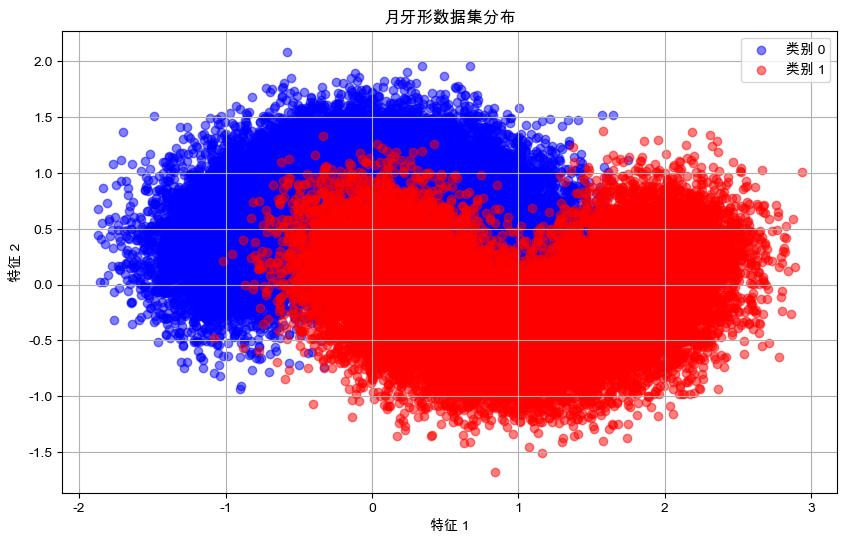

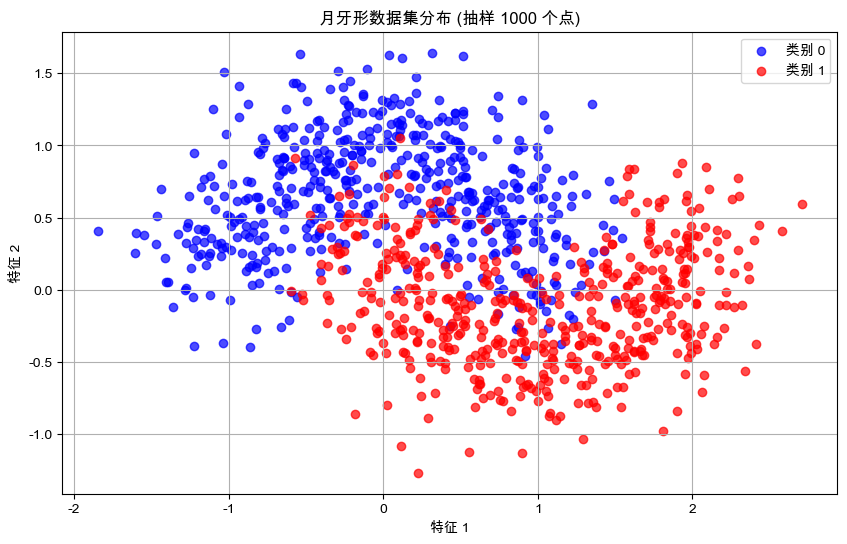

In [3]:
# 导入必要的库
import matplotlib.pyplot as plt

# 将样本数据可视化
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.figure(figsize=(10, 6))
#x[y == 0, 0]表示y为0的样本的第一个特征，x[y == 0, 1]表示y为0的样本的第二个特征
plt.scatter(x[y == 0, 0], x[y == 0, 1], color='blue', alpha=0.5, label='类别 0')
#x[y == 1, 0]表示y为1的样本的第一个特征，x[y == 1, 1]表示y为1的样本的第二个特征
plt.scatter(x[y == 1, 0], x[y == 1, 1], color='red', alpha=0.5, label='类别 1')
plt.title('月牙形数据集分布')
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid(True)
plt.show()

# 为了更好地理解数据分布，我们也可以只绘制一部分样本点
sample_size = 1000
plt.figure(figsize=(10, 6))
plt.scatter(x[:sample_size][y[:sample_size] == 0, 0], x[:sample_size][y[:sample_size] == 0, 1], 
            color='blue', alpha=0.7, label='类别 0')
plt.scatter(x[:sample_size][y[:sample_size] == 1, 0], x[:sample_size][y[:sample_size] == 1, 1], 
            color='red', alpha=0.7, label='类别 1')
plt.title('月牙形数据集分布 (抽样 {} 个点)'.format(sample_size))
plt.xlabel('特征 1')
plt.ylabel('特征 2')
plt.legend()
plt.grid(True)
plt.show()


训练逻辑回归分类器...
训练SVC分类器...
训练决策树分类器...
逻辑回归分类器准确率: 0.8535
SVC分类器准确率: 0.9123
决策树分类器准确率: 0.9054
训练投票分类器...
投票分类器准确率: 0.9123

投票分类器分类报告:


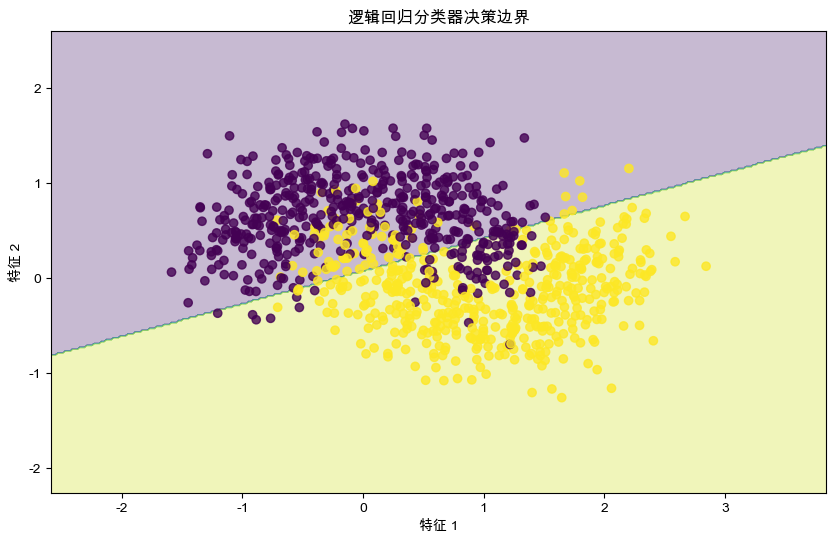

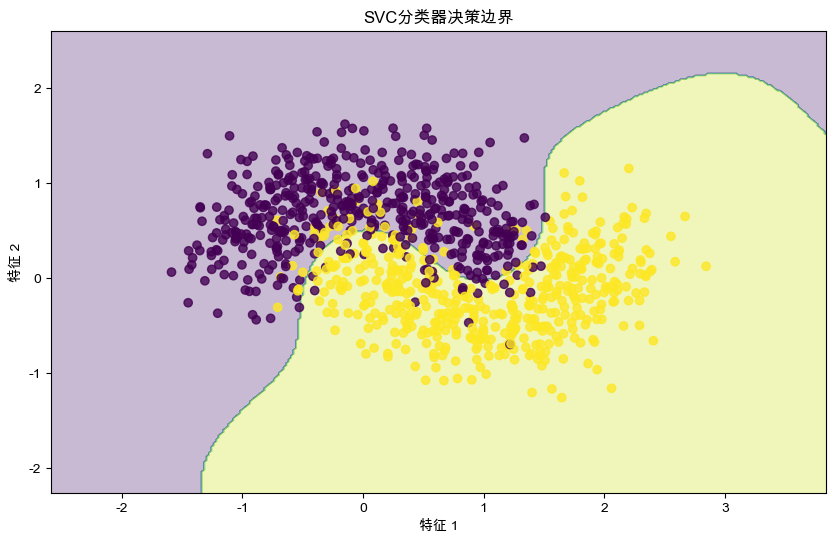

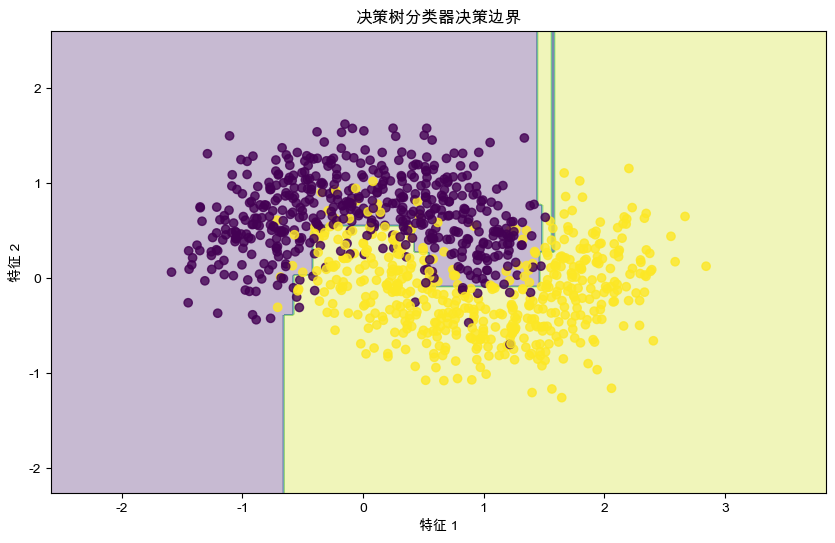

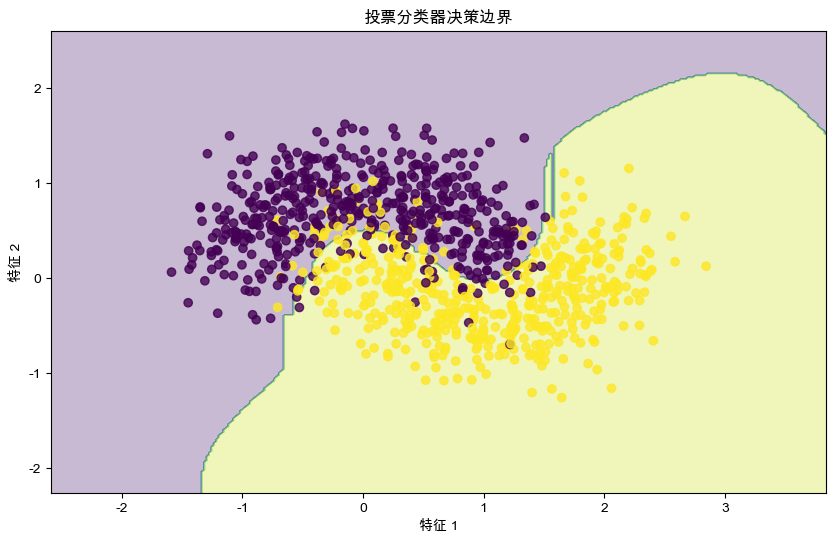

In [4]:
from sklearn.ensemble import VotingClassifier

# 导入必要的分类器
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# 创建三个基分类器
lr_clf = LogisticRegression(max_iter=1000)
svc_clf = SVC(kernel='rbf', probability=True)
dt_clf = DecisionTreeClassifier(max_depth=5)

# 训练三个基分类器
print("训练逻辑回归分类器...")
lr_clf.fit(X_train, y_train)
print("训练SVC分类器...")
svc_clf.fit(X_train, y_train)
print("训练决策树分类器...")
dt_clf.fit(X_train, y_train)

# 在测试集上评估各个基分类器
lr_pred = lr_clf.predict(X_test)
svc_pred = svc_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)

print("逻辑回归分类器准确率:", accuracy_score(y_test, lr_pred))
print("SVC分类器准确率:", accuracy_score(y_test, svc_pred))
print("决策树分类器准确率:", accuracy_score(y_test, dt_pred))

# 创建投票分类器（硬投票）
voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('svc', svc_clf),
        ('dt', dt_clf)
    ],
    voting='hard'
)

# 重新训练投票分类器
print("训练投票分类器...")
voting_clf.fit(X_train, y_train)

# 评估投票分类器
voting_pred = voting_clf.predict(X_test)
print("投票分类器准确率:", accuracy_score(y_test, voting_pred))
print("\n投票分类器分类报告:")


# 可视化不同分类器的决策边界
def plot_decision_boundary(clf, X, y, title):
    h = 0.02  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title(title)
    plt.xlabel('特征 1')
    plt.ylabel('特征 2')
    plt.show()

# 使用测试集的一个子集可视化决策边界（为了加快绘图速度）
X_sample = X_test[:1000]
y_sample = y_test[:1000]

plot_decision_boundary(lr_clf, X_sample, y_sample, "逻辑回归分类器决策边界")
plot_decision_boundary(svc_clf, X_sample, y_sample, "SVC分类器决策边界")
plot_decision_boundary(dt_clf, X_sample, y_sample, "决策树分类器决策边界")
plot_decision_boundary(voting_clf, X_sample, y_sample, "投票分类器决策边界")


In [5]:
# lr_pred = lr_clf.predict(X_test)
# svc_pred = svc_clf.predict(X_test)
# dt_pred = dt_clf.predict(X_test)

ensemble_pred = np.array((lr_pred + svc_pred + dt_pred) >= 2, dtype='int')

# 计算手动集成学习的准确率
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
print("手动集成学习准确率:", ensemble_accuracy)




手动集成学习准确率: 0.9123


In [6]:
# 使用软投票方式创建集成分类器
# 软投票使用预测的概率而不是类标签进行投票
soft_voting_clf = VotingClassifier(
    estimators=[
        ('lr', lr_clf),
        ('svc', svc_clf),
        ('dt', dt_clf)
    ],
    voting='soft'  # 使用软投票
)

# 由于SVC默认不返回概率，我们需要确保已经设置probability=True
# 如果没有设置，可以重新训练
if not hasattr(svc_clf, 'predict_proba'):
    print("重新训练SVC以启用概率预测")
    svc_clf = SVC(probability=True, gamma='auto')
    svc_clf.fit(X_train, y_train)
    
    # 更新集成分类器中的SVC
    soft_voting_clf.estimators[1] = ('svc', svc_clf)

# 训练软投票分类器
soft_voting_clf.fit(X_train, y_train)

# 评估软投票分类器
soft_voting_pred = soft_voting_clf.predict(X_test)
soft_voting_accuracy = accuracy_score(y_test, soft_voting_pred)
print("软投票集成分类器准确率:", soft_voting_accuracy)

# 比较各个分类器在测试集上的准确率
print("逻辑回归准确率:", accuracy_score(y_test, lr_pred))
print("SVC准确率:", accuracy_score(y_test, svc_pred))
print("决策树准确率:", accuracy_score(y_test, dt_pred))




软投票集成分类器准确率: 0.9078
逻辑回归准确率: 0.8535
SVC准确率: 0.9123
决策树准确率: 0.9054


In [7]:
print("手动集成准确率:", ensemble_accuracy)
print("软投票集成准确率:", soft_voting_accuracy)

手动集成准确率: 0.9123
软投票集成准确率: 0.9078


In [8]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    bootstrap=True,    # 使用有放回抽样
    oob_score=True,
    random_state=42
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)

#查oob score,oob score是没有抽样到的样本的准确率
print(f'oob score:{bagging_clf.oob_score_}')

# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)




oob score:0.90145
决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.9006


In [9]:
# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    bootstrap=False,   
    max_samples=40000,   
    random_state=42
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)


# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8741


In [10]:
# 添加njobs参数并统计训练时间
import time
from joblib import parallel_backend

# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 不使用并行计算（单线程）
start_time_single = time.time()
bagging_clf_single = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=1,  # 单线程
    random_state=42
)
bagging_clf_single.fit(X_train, y_train)
single_time = time.time() - start_time_single

base_clf = DecisionTreeClassifier(random_state=42)

# 使用并行计算（多线程）
start_time_multi = time.time()
bagging_clf_multi = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,
    bootstrap=False,
    max_samples=40000,
    n_jobs=-1,  # 使用所有可用的CPU核心
    random_state=42
)
bagging_clf_multi.fit(X_train, y_train)
multi_time = time.time() - start_time_multi

# 预测并计算准确率
single_pred = bagging_clf_single.predict(X_test)
multi_pred = bagging_clf_multi.predict(X_test)

single_accuracy = accuracy_score(y_test, single_pred)
multi_accuracy = accuracy_score(y_test, multi_pred)

# 输出结果
print("单线程 Bagging 训练时间: {:.2f}秒".format(single_time))
print("多线程 Bagging 训练时间: {:.2f}秒".format(multi_time))
print("加速比: {:.2f}倍".format(single_time / multi_time))
print()
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("单线程 Bagging 准确率:", single_accuracy)
print("多线程 Bagging 准确率:", multi_accuracy)


单线程 Bagging 训练时间: 8.76秒
多线程 Bagging 训练时间: 3.84秒
加速比: 2.28倍

决策树(基分类器)准确率: 0.9054
单线程 Bagging 准确率: 0.8741
多线程 Bagging 准确率: 0.8741


In [11]:
# 创建一个决策树作为基分类器
base_clf = DecisionTreeClassifier(random_state=42)

# 创建Bagging分类器，使用决策树作为基本分类器
bagging_clf = BaggingClassifier(
    estimator=base_clf,
    n_estimators=100,  # 使用100个基分类器
    bootstrap=False,   
    max_samples=40000,   
    random_state=42,
    bootstrap_features=True
)

# 训练Bagging分类器
bagging_clf.fit(X_train, y_train)


# 预测
bagging_pred = bagging_clf.predict(X_test)
bagging_accuracy = accuracy_score(y_test, bagging_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)

决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751


In [12]:
# 创建ExtraTrees分类器
# ExtraTrees（Extremely Randomized Trees）是一种集成学习方法，它与随机森林类似，但在树的构建过程中引入了更多的随机性,随机阈值

# 导入ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier

# 创建ExtraTrees分类器
extra_trees_clf = ExtraTreesClassifier(
    n_estimators=100,  # 使用100个树
    criterion='gini',  # 使用基尼不纯度作为分裂标准
    max_depth=None,    # 树的最大深度，None表示不限制
    min_samples_split=2,  # 分裂一个内部节点所需的最小样本数
    min_samples_leaf=1,   # 在叶节点处需要的最小样本数
    max_features='sqrt',  # 寻找最佳分割时考虑的特征数量
    bootstrap=False,      # 是否使用bootstrap抽样
    random_state=42,      # 随机种子，确保结果可复现
    n_jobs=-1             # 使用所有可用的CPU核心
)

# 训练ExtraTrees分类器
extra_trees_clf.fit(X_train, y_train)

# 预测
extra_trees_pred = extra_trees_clf.predict(X_test)
extra_trees_accuracy = accuracy_score(y_test, extra_trees_pred)

# 输出结果
print("决策树(基分类器)准确率:", accuracy_score(y_test, dt_pred))
print("Bagging集成准确率:", bagging_accuracy)
print("ExtraTrees集成准确率:", extra_trees_accuracy)



决策树(基分类器)准确率: 0.9054
Bagging集成准确率: 0.8751
ExtraTrees集成准确率: 0.9018


In [13]:
# 导入AdaBoost分类器
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

# 创建基分类器 - 使用决策树作为AdaBoost的基分类器
base_clf = DecisionTreeClassifier(max_depth=1)  # 决策树桩(深度为1的决策树)

# 创建AdaBoost分类器
ada_clf = AdaBoostClassifier(
    estimator=base_clf,         # 基分类器
    n_estimators=50,            # 弱分类器的数量
    learning_rate=1.0,          # 学习率
    random_state=42             # 随机种子，确保结果可复现
)

# 训练AdaBoost分类器
ada_clf.fit(X_train, y_train)

# 预测
ada_pred = ada_clf.predict(X_test)
ada_accuracy = accuracy_score(y_test, ada_pred)

print("AdaBoost集成准确率:", ada_accuracy)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoost集成准确率: 0.9073


GBDT集成准确率: 0.9124


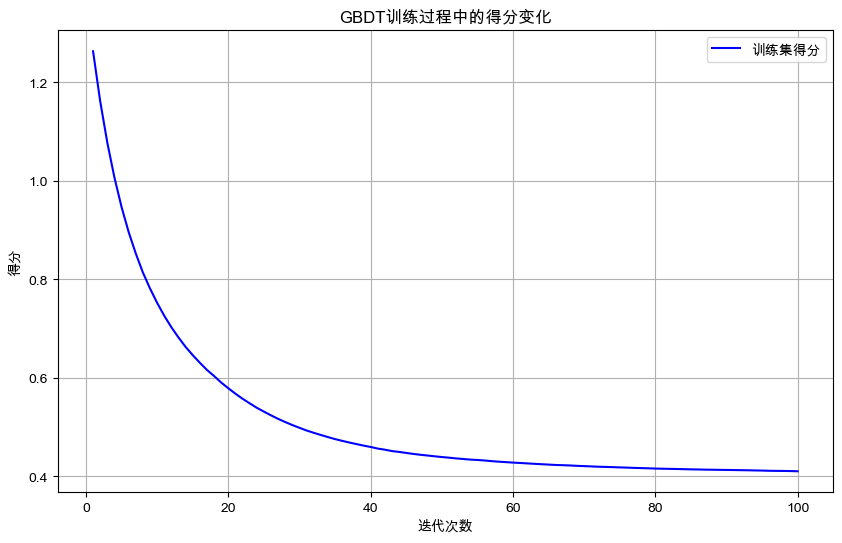

In [14]:
# 导入梯度提升决策树分类器
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import matplotlib.pyplot as plt

# 创建GBDT分类器
gbdt_clf = GradientBoostingClassifier(
    n_estimators=100,           # 弱分类器的数量
    learning_rate=0.1,          # 学习率
    max_depth=3,                # 决策树的最大深度
    min_samples_split=2,        # 分裂内部节点所需的最小样本数
    min_samples_leaf=1,         # 叶节点所需的最小样本数
    subsample=1.0,              # 用于拟合各个基础学习器的样本比例
    random_state=42             # 随机种子，确保结果可复现
)

# 训练GBDT分类器
gbdt_clf.fit(X_train, y_train)

# 预测
gbdt_pred = gbdt_clf.predict(X_test)
gbdt_accuracy = accuracy_score(y_test, gbdt_pred)

print("GBDT集成准确率:", gbdt_accuracy)

# 绘制GBDT的训练过程中的损失函数变化
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(gbdt_clf.train_score_) + 1), gbdt_clf.train_score_, 'b-', label='训练集得分')
plt.xlabel('迭代次数')
plt.ylabel('得分')
plt.title('GBDT训练过程中的得分变化')
plt.legend()
plt.grid(True)
plt.show()
